### CMPE-255 

#### COVID-19 Analysis and Prediction

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib as plt
from matplotlib import *
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pyplot import figure

from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

###### The dataset contains 22 columns and 5434 rows, and is in Yes and No string values

In [20]:
df=pd.read_csv('Covid Dataset.csv')

In [21]:
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

###### Since the dataset contains string values we are going to use label encoder to convert them to 1's and 0's

In [23]:
le=preprocessing.LabelEncoder()

In [24]:
df=df.apply(le.fit_transform)

##### Correlation matrix

<AxesSubplot:title={'center':'Symptoms and Covid Correlation'}>

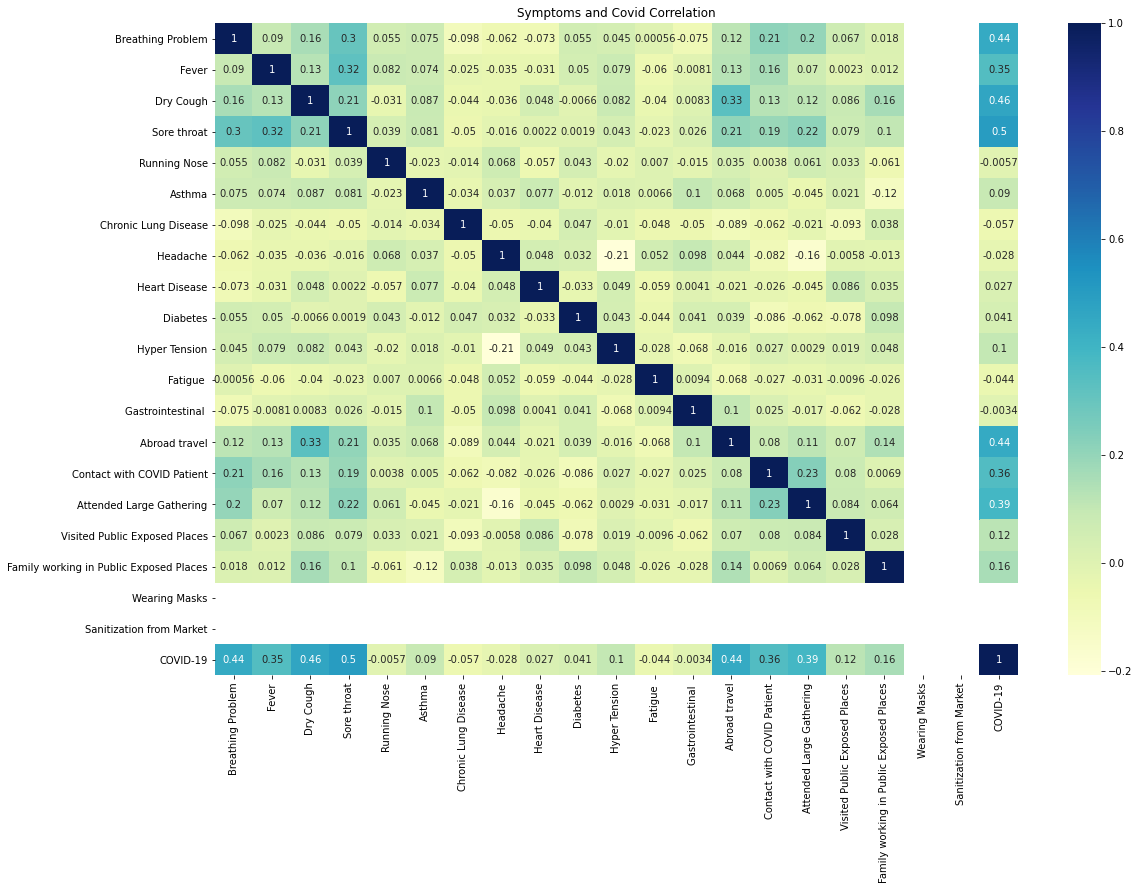

In [7]:
plt.figure(figsize = (18, 12))
plt.title("Symptoms and Covid Correlation")
sns.heatmap(data=df.corr(), annot=True, cmap="YlGnBu")

##### The dataset contains no null values

In [8]:
df.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

##### Visualizations

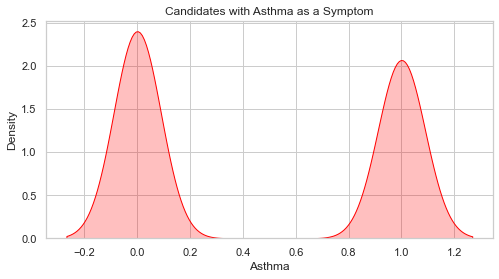

In [9]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")
sns.kdeplot(df['Asthma'], color="red",shade=True)
plt.title("Candidates with Asthma as a Symptom")
plt.xlabel("Asthma")
plt.ylabel("Density")
plt.show()

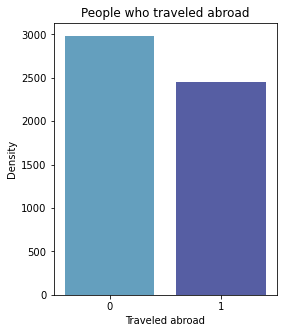

In [8]:
plt.figure(figsize=(4,5))
sns.set_palette("icefire")
sns.countplot(df['Abroad travel'])
plt.title("People who traveled abroad")
plt.xlabel("Traveled abroad")
plt.ylabel("Density")
plt.show()

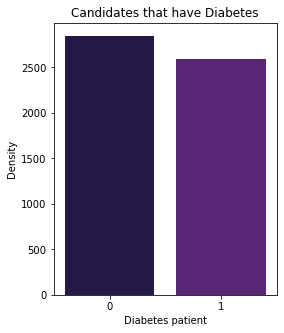

In [9]:
plt.figure(figsize=(4,5))
sns.set_palette("magma")
sns.countplot(df['Diabetes'])
plt.title("Candidates that have Diabetes")
plt.xlabel("Diabetes patient")
plt.ylabel("Density")
plt.show()

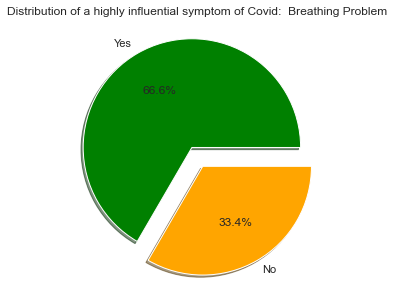

In [12]:
labels=['Yes', "No"]
figure(figsize=(7, 5))
color=['green', 'orange']
plt.pie(df['Breathing Problem'].value_counts(),labels=labels, explode = [0.1,0.1],autopct='%1.1f%%', shadow = True,colors=color)
plt.title('Distribution of a highly influential symptom of Covid:  Breathing Problem');
plt.show() 

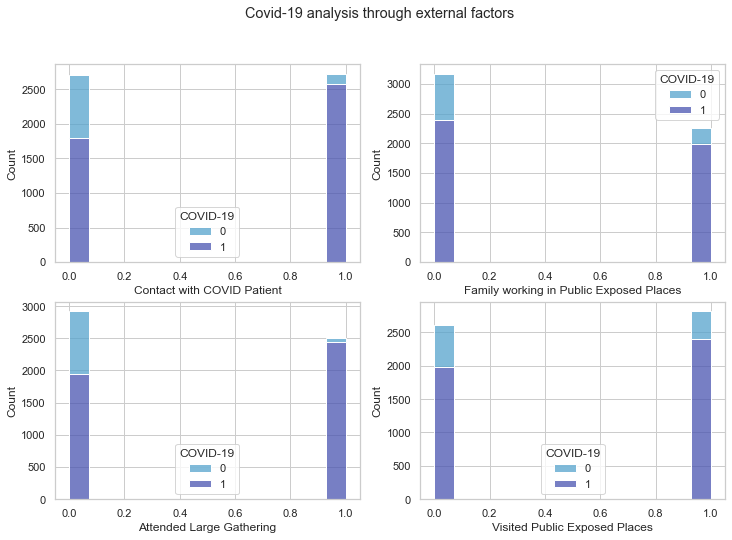

In [13]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.set_palette("icefire")
sns.histplot(x='Contact with COVID Patient',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 0])
sns.histplot(x='Family working in Public Exposed Places',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 1])
sns.histplot(x='Attended Large Gathering',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 0])
sns.histplot(x='Visited Public Exposed Places',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 1])


fig.suptitle("Covid-19 analysis through external factors")
plt.show()

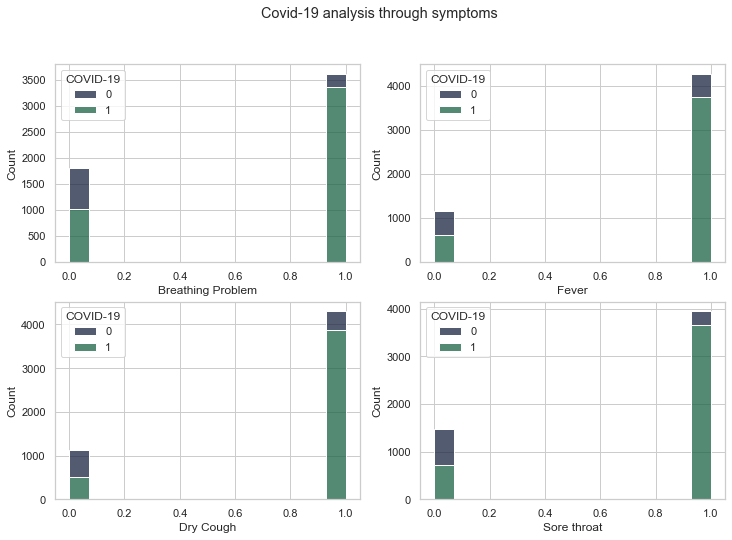

In [14]:
fig, axs = plt.subplots(2,2, figsize=(12,8))
sns.set_palette("cubehelix")
sns.histplot(x='Breathing Problem',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 0])
sns.histplot(x='Fever',hue='COVID-19',data=df, multiple="stack",ax=axs[0, 1])
sns.histplot(x='Dry Cough',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 0])
sns.histplot(x='Sore throat',hue='COVID-19',data=df, multiple="stack",ax=axs[1, 1])


fig.suptitle("Covid-19 analysis through symptoms")
plt.show()

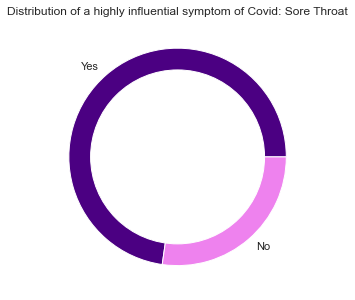

In [15]:
labels=['Yes', "No"]
figure(figsize=(7, 5))
color=['indigo', 'violet']
plt.pie(df['Sore throat'].value_counts(),labels=labels,colors=color)
plt.title('Distribution of a highly influential symptom of Covid: Sore Throat')

my_circle=plt.Circle( (0,0), 0.8, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show() 

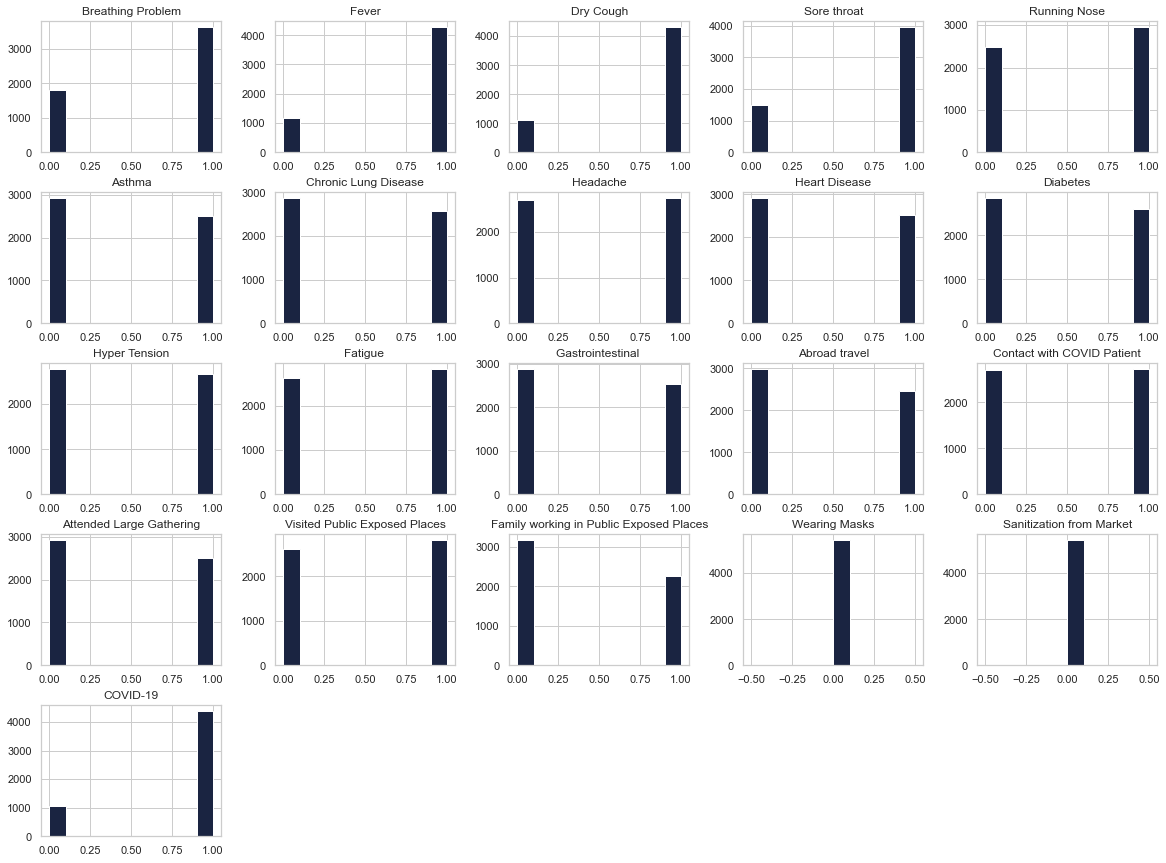

In [16]:
df.hist(figsize=(20,15));

##### Observations after Visualizations
1. As we plot a non significant column such as asthma it shows that many of the people did not show signs of asthma, as we saw in the correlation matrix, asthma did not play a significant role in determining if someone has covid or not.
2. As we have plotted above the people who traveled abroad were in a large number as compared to the people who did not travel. This could be highly significant in knowing if the person has covid or not since the infection usually travels to remote places as a host on people who travel elsewhere.
3. As we can see above in the subplots where we have plotted a few symptoms and the corresponding individuals having covid or not, we can see that the people who experience these symptoms almost, most definitely have COVID-19.
4. Also noting the same observation for the people who were infleunced by the external factors; almost all of them infleunced by the factor have COVID-19.

##### Here we drop the columns where all of the values are 0. These columns do not have missing values but have incorrect values which might cause discrepency in modelling and hence we are going to discard them.

In [25]:
df=df.drop(columns=['Wearing Masks','Sanitization from Market'])

##### Below we are plotting the correlation in the df before excluding columns with low correlation. 
As we can see below the mean correlation is 0.043 between all the coumns, which is a low value.


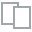
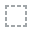
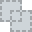
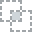
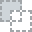
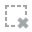
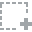
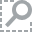
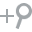
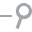
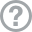
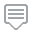
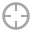
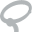
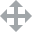
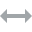
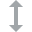
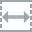
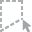
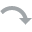
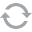
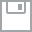
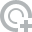
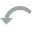
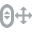
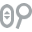
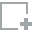
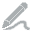
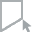
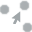
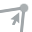
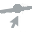

In [26]:
plot_correlation(df)

##### Dropping columns with low Correlation

In [27]:
df=df.drop(columns=['Running Nose','Chronic Lung Disease','Headache', 'Heart Disease', 'Diabetes', 'Gastrointestinal ', 'Asthma','Fatigue ' ])

##### As we can see below after dropping the less correlating columns we get a much better mean correlation score, 0.139.


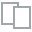
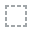
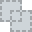
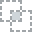
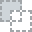
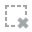
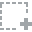
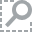
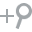
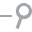
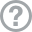
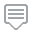
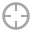
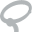
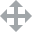
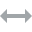
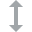
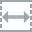
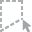
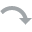
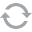
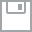
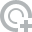
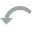
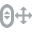
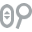
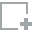
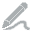
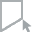
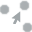
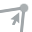
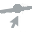

In [28]:
plot_correlation(df)

##### Modelling

In [20]:
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [107]:
x=df.iloc[ : , :-1]
y=df.iloc[ : , -1]

###### Using Sklearn's train test split to split the dataset

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=5)

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_lr=model.score(x_test, y_test)*100
accuracy_lr

96.04415823367066

In [119]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_svm=clf.score(x_test, y_test)*100
accuracy_svm

96.96412143514259

In [120]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
accuracy_gnb= model.score(x_test, y_test)*100
accuracy_gnb=

77.27690892364305

In [121]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
accuracy_dtc=dtc.score(x_test, y_test)*100
accuracy_dtc

96.96412143514259

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn=knn.score(x_test, y_test)*100
accuracy_knn

96.41214351425943

In [123]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
accuracy_rf=model.score(x_test, y_test)*100
accuracy_rf

96.8721251149954

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=4)
gbc.fit(x_train, y_train)
accuracy_gbc=gbc.score(x_test, y_test)*100
accuracy_gbc

96.78012879484821

In [36]:
import keras

##### We are going to take the last 500 rows from x_train, y_train for validation and rest of the data for training.

In [76]:
import tensorflow as tf

##### Implementing Keras Sequential Model

In [125]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(10,)))
model.add(Dropout(0.45))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(1, activation='sigmoid'))


In [126]:
optimizer = keras.optimizers.Adam(lr=0.0001)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', restore_best_weights= True, patience= 200)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
                   
history= model.fit(x_train, y_train, epochs=200,batch_size=2,  verbose=1, validation_data=(x_test, y_test), callbacks=[callback])

Epoch 1/200
2174/2174 [==============================] - 5s 2ms/step - loss: 0.5702 - accuracy: 0.7279 - val_loss: 0.4223 - val_accuracy: 0.8050
Epoch 2/200
2174/2174 [==============================] - 3s 2ms/step - loss: 0.4739 - accuracy: 0.7770 - val_loss: 0.3743 - val_accuracy: 0.8050
Epoch 3/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.4372 - accuracy: 0.8014 - val_loss: 0.3538 - val_accuracy: 0.8050
Epoch 4/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.4325 - accuracy: 0.7970 - val_loss: 0.3385 - val_accuracy: 0.8050
Epoch 5/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.4028 - accuracy: 0.8002 - val_loss: 0.3235 - val_accuracy: 0.8050
Epoch 6/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.3863 - accuracy: 0.7963 - val_loss: 0.3071 - val_accuracy: 0.8050
Epoch 7/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.3816 - accuracy: 0.7954 - val_loss: 0.2954 - val_ac

2174/2174 [==============================] - 4s 2ms/step - loss: 0.1435 - accuracy: 0.9465 - val_loss: 0.0940 - val_accuracy: 0.9641
Epoch 58/200
2174/2174 [==============================] - 3s 2ms/step - loss: 0.1532 - accuracy: 0.9399 - val_loss: 0.0941 - val_accuracy: 0.9660
Epoch 59/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1680 - accuracy: 0.9379 - val_loss: 0.0937 - val_accuracy: 0.9641
Epoch 60/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9406 - val_loss: 0.0925 - val_accuracy: 0.9650
Epoch 61/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1550 - accuracy: 0.9438 - val_loss: 0.0921 - val_accuracy: 0.9650
Epoch 62/200
2174/2174 [==============================] - 3s 2ms/step - loss: 0.1413 - accuracy: 0.9442 - val_loss: 0.0921 - val_accuracy: 0.9650
Epoch 63/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1488 - accuracy: 0.9425 - val_loss: 0.0920 - val_accuracy

2174/2174 [==============================] - 4s 2ms/step - loss: 0.1263 - accuracy: 0.9535 - val_loss: 0.0762 - val_accuracy: 0.9687
Epoch 114/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9354 - val_loss: 0.0760 - val_accuracy: 0.9696
Epoch 115/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1390 - accuracy: 0.9399 - val_loss: 0.0760 - val_accuracy: 0.9660
Epoch 116/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9427 - val_loss: 0.0750 - val_accuracy: 0.9660
Epoch 117/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1284 - accuracy: 0.9394 - val_loss: 0.0749 - val_accuracy: 0.9660
Epoch 118/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1278 - accuracy: 0.9481 - val_loss: 0.0743 - val_accuracy: 0.9660
Epoch 119/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1349 - accuracy: 0.9377 - val_loss: 0.0740 - val_ac

Epoch 169/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9489 - val_loss: 0.0630 - val_accuracy: 0.9715
Epoch 170/200
2174/2174 [==============================] - 3s 2ms/step - loss: 0.1266 - accuracy: 0.9462 - val_loss: 0.0624 - val_accuracy: 0.9715
Epoch 171/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9486 - val_loss: 0.0625 - val_accuracy: 0.9715
Epoch 172/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1365 - accuracy: 0.9454 - val_loss: 0.0626 - val_accuracy: 0.9715
Epoch 173/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1163 - accuracy: 0.9490 - val_loss: 0.0621 - val_accuracy: 0.9715
Epoch 174/200
2174/2174 [==============================] - 3s 1ms/step - loss: 0.1109 - accuracy: 0.9517 - val_loss: 0.0618 - val_accuracy: 0.9715
Epoch 175/200
2174/2174 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9505 - val_loss: 0

##### Train and Test Validation Accuracy plot

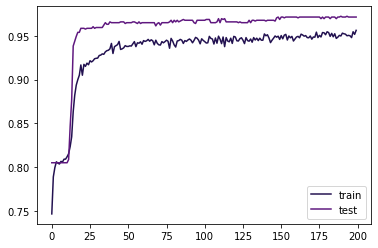

In [127]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [128]:
y_pred=model.predict(x_test)

In [129]:
y_pred=np.where(y_pred>0.5,1,0)

In [142]:
accuracy_nn= accuracy_score(y_test, y_pred)*100
accuracy_nn

97.148114075437

In [148]:
from sklearn.metrics import confusion_matrix
cf_m=confusion_matrix(y_test, y_pred)

In [149]:
cf_m

array([[183,  29],
       [  2, 873]], dtype=int64)

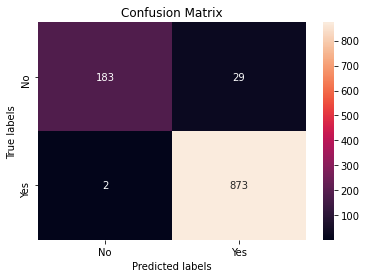

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_m, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [136]:
from tabulate import tabulate
from IPython.display import HTML, display

In [143]:
display(HTML(tabulate([['Logistic Regression',accuracy_lr],['SVM', accuracy_svm],['Gaussian NB', accuracy_gnb],["Decision Tree Classifier", accuracy_dtc], ["KNN Classifier",accuracy_knn], ["Random Forest", accuracy_rf],["Gradient Boosting Classifier", accuracy_gbc], ['Neural Networks',accuracy_nn ]],\
                                                   ["Model", "Accuracy"], tablefmt="html")))

Model,Accuracy
Logistic Regression,96.0442
SVM,96.9641
Gaussian NB,77.2769
Decision Tree Classifier,96.9641
KNN Classifier,96.4121
Random Forest,96.8721
Gradient Boosting Classifier,96.7801
Neural Networks,97.1481


##### Model Evaluation
1. The models that we used were classification models. We used tree based classification, neural networks based classification and regression based classification. 
2. Almost all of the models performed well with highly comparable accuracies. 
3. The best performing model was Keras Sequential neural networks model.


##### Conclusion
1. The covid symptom analysis neural network model wrongly predicted 29 Covid negative individuals, and wrongly predicted 2 Covid positive individuals.
2. The covid analysis project depicts that the presence of covid is highly dependent on the short term symptoms such as Sore Throat, Dry Cough, Fever, and not much dependant on the long term effects such as, Asthma, Diabetes, Gastrointestinal.
3. The external factors play a large role in identifying a covid positive person. Therefore it can be concluded that monitoring of these factors are equally as important, if not more.
4. The accuracy of our model is high which also proves the conjectures made above.